## (1) Dataset

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv("housing.csv")

In [162]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## (2) Tasks

### (A) Data preprocessing

#### Checking Null Values

In [163]:
## checking null values in dataset
df.isnull().sum()
df = df.dropna()

#### Dividing the datasets into x_train, x_test, y_train, y_test

In [164]:
X = df.drop("ocean_proximity", axis=1).values

test_size = 0.2
n = len(df)
test_count = int(n * test_size)

indices = np.arange(n)
np.random.shuffle(indices)
test_idx = indices[:test_count]
train_idx = indices[test_count:]
x_train, x_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [165]:
x_train

array([[-1.1833e+02,  3.3930e+01,  3.8000e+01, ...,  1.1900e+02,
         6.0718e+00,  1.5600e+05],
       [-1.1792e+02,  3.3630e+01,  3.4000e+01, ...,  4.9000e+02,
         4.9643e+00,  3.1790e+05],
       [-1.2225e+02,  3.7860e+01,  5.2000e+01, ...,  2.9500e+02,
         5.0463e+00,  4.5630e+05],
       ...,
       [-1.1833e+02,  3.4050e+01,  4.4000e+01, ...,  4.0400e+02,
         2.5284e+00,  2.2630e+05],
       [-1.2234e+02,  3.7950e+01,  4.5000e+01, ...,  2.7000e+02,
         3.6719e+00,  1.3410e+05],
       [-1.2220e+02,  3.7760e+01,  3.7000e+01, ...,  6.6700e+02,
         1.4097e+00,  8.4600e+04]])

In [166]:
y_train

array([165600., 373700., 489600., ..., 316700., 133300.,  70000.])

In [167]:
x_test

array([[-1.2040e+02,  3.4950e+01,  8.0000e+00, ...,  2.9000e+02,
         5.0206e+00,  2.6100e+05],
       [-1.1834e+02,  3.3900e+01,  2.3000e+01, ...,  4.9300e+02,
         4.9779e+00,  2.2460e+05],
       [-1.1780e+02,  3.3690e+01,  1.5000e+01, ...,  3.0700e+02,
         7.9887e+00,  3.2800e+05],
       ...,
       [-1.2243e+02,  3.7780e+01,  4.9000e+01, ...,  5.4600e+02,
         2.9792e+00,  3.5000e+05],
       [-1.2123e+02,  3.7810e+01,  1.5000e+01, ...,  5.5700e+02,
         4.2431e+00,  1.3710e+05],
       [-1.1825e+02,  3.3930e+01,  4.2000e+01, ...,  2.2800e+02,
         1.1346e+00,  8.5400e+04]])

In [168]:
y_test

array([300000., 245800., 480800., ..., 167200., 155000.,  89700.])

#### Implementing Standardization from scratch

#### We have a mathematical formula for standardization
#### Z-Score = (Current_value - Mean) / Standard Deviation.

In [169]:
import numpy as np

def Standardization_train(array):
    array = np.array(array, dtype=float)
    mean = np.mean(array, axis=0)
    std = np.std(array, axis=0)
    std[std == 0] = 1   # avoid division by zero
    return (array - mean) / std, mean, std

def Standardization_test(array, mean, std):
    array = np.array(array, dtype=float)
    return (array - mean) / std


In [170]:
scaled_x_train = Standardization(x_train)
scaled_x_test  = Standardization(x_test)

In [171]:
scaled_x_train

array([[ 0.62469167, -0.80143423,  0.73866486, ..., -0.99731909,
         1.14721775, -0.44496555],
       [ 0.82935056, -0.94181681,  0.42151425, ..., -0.02145923,
         0.56692722,  0.94815527],
       [-1.332047  ,  1.03757759,  1.84869199, ..., -0.53437749,
         0.6098923 ,  2.13906275],
       ...,
       [ 0.62469167, -0.74528119,  1.21439077, ..., -0.24766933,
        -0.70939756,  0.15995349],
       [-1.37697212,  1.07969236,  1.29367842, ..., -0.60013624,
        -0.11024432, -0.63341117],
       [-1.3070886 ,  0.99078339,  0.6593772 , ...,  0.44411273,
        -1.29555649, -1.0593499 ]])

In [172]:
scaled_x_test

array([[-0.43540171, -0.3025732 , -1.6336743 , ..., -0.54926602,
         0.64160666,  0.51273189],
       [ 0.59268052, -0.79484097, -0.43423614, ..., -0.02953263,
         0.61866176,  0.18828167],
       [ 0.86217781, -0.89329452, -1.07393649, ..., -0.50574155,
         2.23651914,  1.10993422],
       ...,
       [-1.44851187,  1.02420565,  1.64478999, ...,  0.10616131,
        -0.45534234,  1.3060305 ],
       [-0.84962902,  1.03827044, -1.07393649, ...,  0.13432421,
         0.22381601, -0.59164674],
       [ 0.63759674, -0.78077618,  1.08505218, ..., -0.70800233,
        -1.44654059, -1.05247302]])

### (B) Implementing Normal Equation

In [173]:
class NormalEquation:
    def __init__(self):
        pass

    def fit(self, x_train, y_train):
        modified_x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]
        transposed_modified_x_train = np.transpose(modified_x_train)
        theta = np.linalg.inv((transposed_modified_x_train @ modified_x_train)) @ (transposed_modified_x_train @ y_train)
        self.theta = theta

    def predict(self, x_test):
        modified_x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
        return modified_x_test@(self.theta)

In [174]:
model_normal_equation = NormalEquation()
model_normal_equation.fit(x_train=scaled_x_train, y_train=y_train)

In [175]:
y_pred_normal_equation = model_normal_equation.predict(x_test=scaled_x_test)
y_pred_normal_equation

array([253347.44233066, 223038.55250662, 246091.12752855, ...,
       290917.61865945, 175028.29614362, 171211.85287713])

### (C) Implementing Batch Gradient Descent

In [176]:
class GradientDescent:
    def __init__(self):
        pass

    def fit(self, x_train, y_train, epochs = 200, learning_rate = 0.01):
        rows, cols = x_train.shape
        modified_x_train = np.c_[np.ones((rows, 1)), x_train]
        modified_x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
        transpose_modified_x_train = np.transpose(modified_x_train)
        theta = np.zeros((cols+1, 1))

        loss_per_iterations = []
        weights = []
        val_loss = []

        y_train = y_train.reshape(-1, 1)

        for i in range(epochs):
            y_pred_before = modified_x_train@theta
            theta-=learning_rate*(transpose_modified_x_train@(y_pred_before - y_train))/rows

            y_pred_after = modified_x_train@theta
            loss_per_iterations.append(np.mean(((y_pred_after - y_train) ** 2)))
            weights.append(theta[5][0])
            val_loss.append(np.mean(((modified_x_test@theta) - y_test)**2))

        self.loss_per_iterations = loss_per_iterations
        self.theta = theta
        self.weights = weights
        self.val_loss = val_loss

    def predict(self, x_test):
        modified_x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
        return modified_x_test@(self.theta)

In [177]:
model_gradient_descent = GradientDescent()
model_gradient_descent.fit(x_train=scaled_x_train, y_train=y_train)

In [178]:
y_pred_gradient_descent = model_gradient_descent.predict(scaled_x_test)
y_pred_gradient_descent

array([[194832.28288992],
       [189264.35150979],
       [224573.18021936],
       ...,
       [238857.48465664],
       [152611.93048167],
       [139231.97809951]])

### (D) Using Scikit-Learn

In [179]:
from sklearn.linear_model import LinearRegression
model_scikit_learn = LinearRegression()
model_scikit_learn.fit(x_train, y_train)

LinearRegression()

In [180]:
y_pred_scikit_learn = model_scikit_learn.predict(scaled_x_test)
y_pred_scikit_learn

array([-1651184.2805632 , -1663228.82251616, -1668032.39087348, ...,
       -1654098.98190135, -1666988.21810436, -1663112.52846895])

### (E) Visualizations

##### Plotting MSE against iteration number

In [182]:
curves = []
epochs = 200

## Unscaled
for lr in [1e-7, 1e-8, 1e-9]:
    gd = GradientDescent()
    gd.fit(x_train=x_train, y_train=y_train, epochs=epochs, learning_rate=lr)
    curves.append((f"unscaled, lr={lr}", gd.loss_per_iterations))

## Scaled
for lr in [0.1, 0.01, 0.001]:
    gd = GradientDescent()
    gd.fit(x_train=scaled_x_train, y_train=y_train, epochs=epochs, learning_rate=lr)
    curves.append((f"scaled, lr={lr}", gd.loss_per_iterations))

/tmp/ipython-input-1744191268.py:23: RuntimeWarning: overflow encountered in square
  loss_per_iterations.append(np.mean(((y_pred_after - y_train) ** 2)))
/tmp/ipython-input-1744191268.py:25: RuntimeWarning: overflow encountered in square
  val_loss.append(np.mean(((modified_x_test@theta) - y_test)**2))
/tmp/ipython-input-1744191268.py:20: RuntimeWarning: overflow encountered in matmul
  theta-=learning_rate*(transpose_modified_x_train@(y_pred_before - y_train))/rows
/tmp/ipython-input-1744191268.py:20: RuntimeWarning: invalid value encountered in subtract
  theta-=learning_rate*(transpose_modified_x_train@(y_pred_before - y_train))/rows


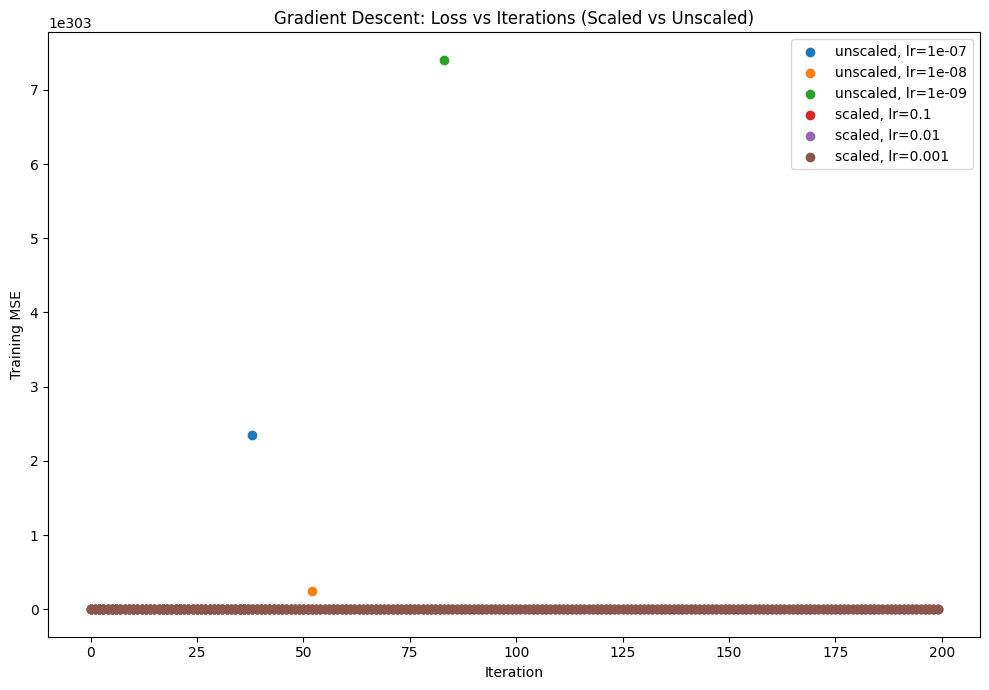

In [192]:
plt.figure(figsize=(10,7))
for label, loss in curves:
    plt.scatter(range(len(loss)), loss, label=label)

plt.xlabel("Iteration")
plt.ylabel("Training MSE")
plt.title("Gradient Descent: Loss vs Iterations (Scaled vs Unscaled)")
plt.yscale("linear")
plt.legend()
plt.tight_layout()
plt.show()

##### Gradient Descent Visualization

In [184]:
gd = GradientDescent()
gd.fit(x_train = scaled_x_train, y_train=y_train, epochs=50, learning_rate=0.1)

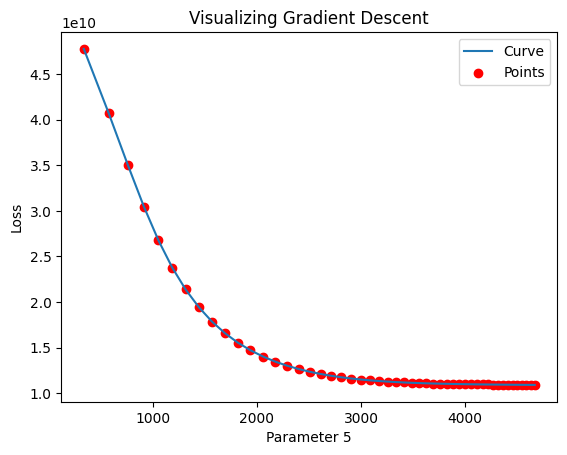

In [185]:
plt.plot(gd.weights, gd.loss_per_iterations, label="Curve")
plt.scatter(gd.weights, gd.loss_per_iterations, label="Points", color = "red")
plt.title("Visualizing Gradient Descent")
plt.xlabel("Parameter 5");
plt.ylabel("Loss");
plt.legend();
plt.show()

##### Plotting the Validation Loss

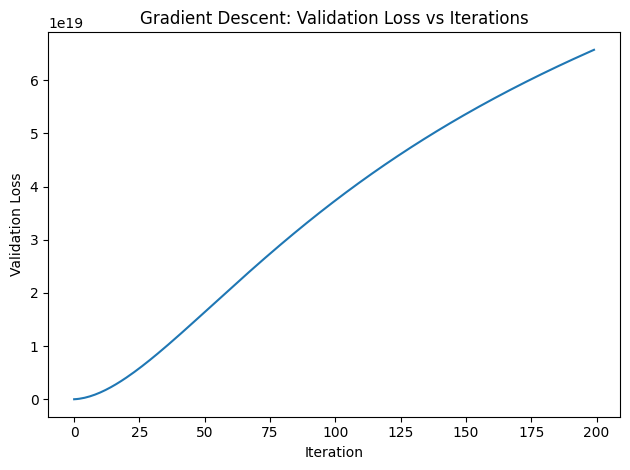

In [186]:
plt.plot(range(len(model_gradient_descent.val_loss)), model_gradient_descent.val_loss)
plt.xlabel("Iteration")
plt.ylabel("Validation Loss")
plt.title("Gradient Descent: Validation Loss vs Iterations")
plt.yscale("linear")
plt.tight_layout()
plt.show()

### (F) Evaluation Metrics

In [187]:
def PerformanceMetrics(y_pred, y_test):
    MAE = np.mean(np.abs(y_pred - y_test))
    MSE = np.mean((y_pred - y_test) ** 2)
    RMSE = np.sqrt(MSE)

    # For R^2 score
    rss = np.sum((y_test - y_pred) ** 2)
    tss = np.sum((y_test - np.mean(y_test)) ** 2)
    R2 = 1 - rss / tss

    print("Mean Squared Error (MSE):", MSE)
    print("Root Mean Squared Error (RMSE):", RMSE)
    print("Mean Absolute Error (MAE):", MAE)
    print("R^2 Score:", R2)

In [188]:
print("Metrics of Linear Regression by Normal Equation: ")
PerformanceMetrics(y_pred = y_pred_normal_equation, y_test=y_test)
print()
print("Metrics of Linear Regression by Gradient Descent: ")
PerformanceMetrics(y_pred = y_pred_gradient_descent, y_test=y_test)
print()
print("Metrics of Linear Regression by Scikit Learn: ")
PerformanceMetrics(y_pred = y_pred_scikit_learn, y_test=y_test)

Metrics of Linear Regression by Normal Equation: 
Mean Squared Error (MSE): 10446290997.51371
Root Mean Squared Error (RMSE): 102207.09856714313
Mean Absolute Error (MAE): 78243.98725659189
R^2 Score: 0.20337326928193822

Metrics of Linear Regression by Gradient Descent: 
Mean Squared Error (MSE): 15595274490.319235
Root Mean Squared Error (RMSE): 124881.04135664162
Mean Absolute Error (MAE): 93893.24422378922
R^2 Score: -4858.416688403402

Metrics of Linear Regression by Scikit Learn: 
Mean Squared Error (MSE): 3513365620518.049
Root Mean Squared Error (RMSE): 1874397.401971644
Mean Absolute Error (MAE): 1871013.1016884125
R^2 Score: -266.926766424243
